In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


### Paso 1

In [2]:
# Paso 1 - Creadondo data set de prueba

X, _= make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
df_r = pd.DataFrame(X, columns=['Caracteristica1', 'Caracteristica2'])

In [3]:
df_r

,Caracteristica1,Caracteristica2
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437
...,...,...
295,-3.660191,9.389984
296,3.810884,1.412989
297,-4.116681,9.198920
298,-8.819909,8.999960


In [4]:
# Creando 4 features --> n_features=4. Por defecto, si no se coloca, crea 2 features
X, _= make_blobs(n_samples=300, centers=4, n_features=5, cluster_std=1.0, random_state=42)
df_r = pd.DataFrame(X, columns=['Caracteristica1', 'Caracteristica2', 'Caracteristica3', 'Caracteristica4', 'Caracteristica5'])

In [5]:
df_r

,Caracteristica1,Caracteristica2,Caracteristica3,Caracteristica4,Caracteristica5
0,-7.005400,-3.636161,-0.340218,0.784050,-5.363016
1,-5.498381,-5.908891,0.869185,-0.133431,-5.385058
2,-5.578568,-3.533997,1.784881,-0.687918,-4.313873
3,-10.948166,10.144451,7.294337,-3.589963,-6.671279
4,-7.835650,-10.444774,7.526987,1.265949,2.739198
...,...,...,...,...,...
295,-8.663676,9.457827,6.001916,-5.054994,-5.970015
296,-9.321260,10.287828,6.731137,-4.687737,-6.880789
297,-7.802275,-7.968722,8.679161,2.435735,6.038247
298,-6.525569,-4.631977,-1.371408,-1.443780,-4.297165


### Paso 2 

In [6]:
# Paso 2 - Selección de características

features = ['Caracteristica1', 'Caracteristica2', 'Caracteristica3', 'Caracteristica4', 'Caracteristica5']

### Paso 3

In [7]:
# Paso 3 - Normalización de datos
scaler = StandardScaler()
df_r[features] = scaler.fit_transform(df_r[features])

In [8]:
df_r

,Caracteristica1,Caracteristica2,Caracteristica3,Caracteristica4,Caracteristica5
0,-0.242343,-0.626038,-1.801111,0.444058,-0.452876
1,0.293701,-0.905787,-1.380775,0.157965,-0.457757
2,0.265178,-0.613462,-1.062520,-0.014937,-0.220538
3,-1.644777,1.070212,0.852324,-0.919864,-0.742598
4,-0.537661,-1.464107,0.933183,0.594326,1.341404
...,...,...,...,...,...
295,-0.832188,0.985696,0.403135,-1.376696,-0.587299
296,-1.066089,1.087860,0.656580,-1.262177,-0.788995
297,-0.525790,-1.159331,1.333628,0.959093,2.071996
298,-0.071668,-0.748612,-2.159507,-0.250633,-0.216837


### Paso 4

In [9]:
# Paso 4 - Elección del número de clústeres (K)
# Asuminos que sabemos el número de clústeres 4
K = 4

### Paso 5

In [10]:
# Paso 5 - Aplicación del algoritmo K-Means
kmeans = KMeans(n_clusters=K, random_state=42)
df_r['Cluster'] = kmeans.fit_predict(df_r[features])

### Paso 6

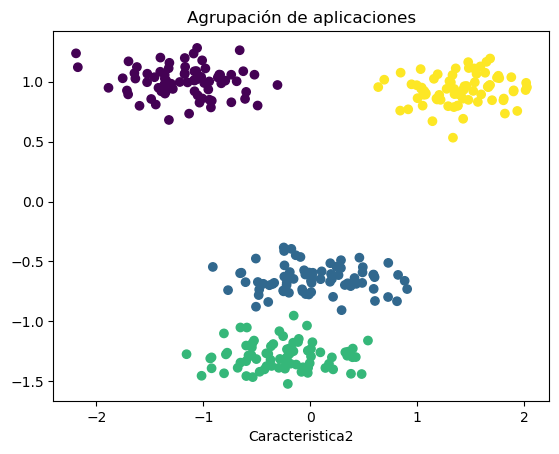

In [11]:
# Paso 6 - Análisis de resultados
# En este ejemplo, visualizaremos los clústeres.
plt.scatter(df_r['Caracteristica1'], df_r['Caracteristica2'], c=df_r['Cluster'], cmap='viridis')
plt.xlabel('Caracteristica1')
plt.xlabel('Caracteristica2')
plt.title('Agrupación de aplicaciones')
plt.show()

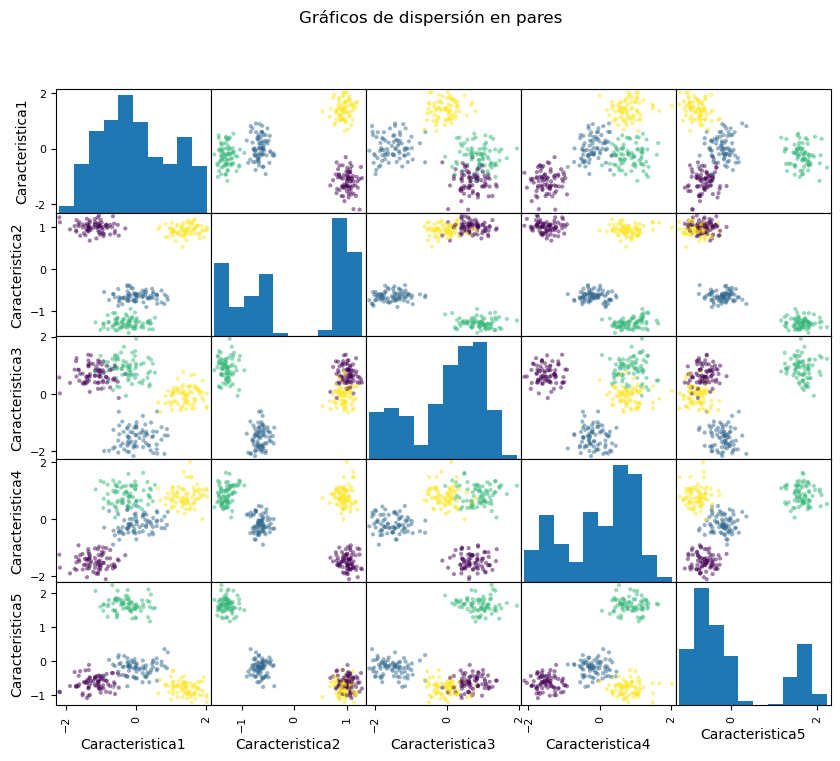

In [12]:
# Paso 6A - Gráfico de disperción en pares
# Utiliza todas las características, 5 en este ejemplo
scatter_matrix(df_r[features], alpha=0.5, figsize=(10,8), c=df_r['Cluster'], cmap='viridis', diagonal='hist')
plt.suptitle('Gráficos de dispersión en pares')
plt.show()

### Paso 7

In [13]:
# Paso 7 - Aignación de categorias (manualmente).
# En este ejemplo, asignaremos manualmente etiquetas a los clústeres.
categorias = {
                0: 'Categoría A',
                1: 'Categoría B',
                2: 'Categoría C',
                3: 'Categoría D',    
            }
df_r['Categoria'] = df_r['Cluster'].map(categorias)

### Paso 8

In [35]:
# Paso 8 - Validación (no se realiza en este ejemplo de datos de muestra)

In [14]:
# Mostrar el dataframe con las categorías asignadas:
print(df_r[['Caracteristica1', 'Caracteristica2', 'Categoria']])

     Caracteristica1  Caracteristica2    Categoria
0          -0.242343        -0.626038  Categoría B
1           0.293701        -0.905787  Categoría B
2           0.265178        -0.613462  Categoría B
3          -1.644777         1.070212  Categoría A
4          -0.537661        -1.464107  Categoría C
..               ...              ...          ...
295        -0.832188         0.985696  Categoría A
296        -1.066089         1.087860  Categoría A
297        -0.525790        -1.159331  Categoría C
298        -0.071668        -0.748612  Categoría B
299        -0.042347        -0.771641  Categoría B

[300 rows x 3 columns]
